1.

a)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [5]:
d1 = pd.read_csv('COVIDincubation.txt')

In [10]:
d2 = d1[d1['age'] <= 40]
d3 = d1[d1['age'] > 40]

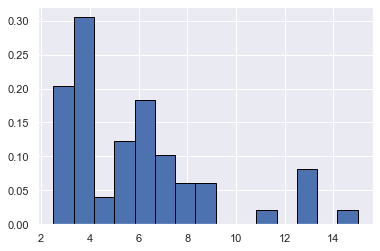

In [13]:
hist1 = plt.hist(d1['symp_days'], bins=15, density=True, edgecolor='black')

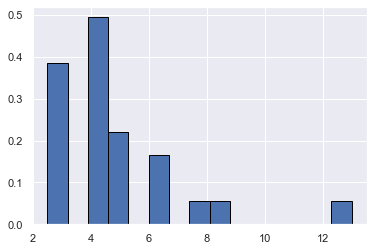

In [14]:
hist2 = plt.hist(d2['symp_days'], bins=15, density=True, edgecolor='black')

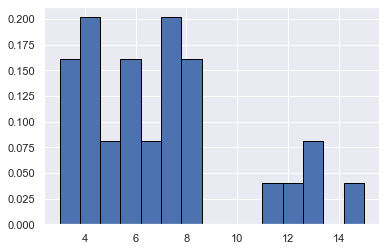

In [15]:
hist3 = plt.hist(d3['symp_days'], bins=15, density=True, edgecolor='black')

b)

In [16]:
from sklearn.neighbors import KernelDensity

from sklearn.model_selection import GridSearchCV, LeaveOneOut

In [26]:
bandwidths = 10 ** np.linspace(-1, 1, 500)

grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())

In [27]:
grid.fit(d1['symp_days'][:, None])

GridSearchCV(cv=LeaveOneOut(), error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([-1.00000000e-01, -7.97595190e-02, -5.95190381e-02, -3.92785571e-02,
       -1.90380762e-02,  1.2024...
        9.61543086e+00,  9.63567134e+00,  9.65591182e+00,  9.67615230e+00,
        9.69639279e+00,  9.71663327e+00,  9.73687375e+00,  9.75711423e+00,
        9.77735471e+00,  9.79759519e+00,  9.81783567e+00,  9.83807615e+00,
        9.85831663e+00,  9.87855711e+00,  9.89879760e+00,  9.91903808e+00,
        9.93927856e+00,  9.95951904e+00,  9.97975952e+00,  1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sc

In [29]:
grid.best_params_

{'bandwidth': 0.8917835671342685}

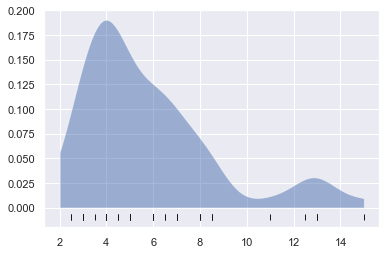

In [32]:
opt_bandwidth = grid.best_params_['bandwidth']
kde = KernelDensity(bandwidth=opt_bandwidth, kernel='gaussian')
kde.fit(d1['symp_days'][:, None])

d1_d = np.linspace(2, 15, 1000)
logprob1 = kde.score_samples(d1_d[:, None])

plt.fill_between(d1_d, np.exp(logprob1), alpha=0.5)
plt.plot(d1['symp_days'], np.full_like(d1['symp_days'], -0.01), '|k', markeredgewidth=1)

In [50]:
grid.fit(d2['symp_days'][:, None])
opt_bandwidth2 = grid.best_params_['bandwidth']
kde2 = KernelDensity(bandwidth=opt_bandwidth2, kernel='gaussian')
kde2.fit(d2['symp_days'][:, None])

d2_d = np.linspace(2, 15, 1000)
logprob2 = kde2.score_samples(d2_d[:, None])

In [51]:
grid.fit(d3['symp_days'][:, None])
opt_bandwidth3 = grid.best_params_['bandwidth']
kde3 = KernelDensity(bandwidth=opt_bandwidth3, kernel='gaussian')
kde3.fit(d3['symp_days'][:, None])

d3_d = np.linspace(2, 15, 1000)
logprob3 = kde3.score_samples(d3_d[:, None])

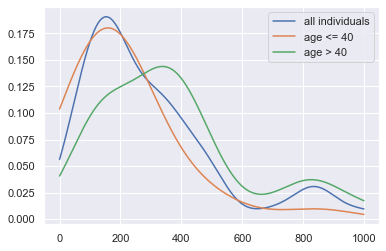

In [53]:
plt.plot(np.exp(logprob1), label='all individuals')
plt.plot(np.exp(logprob2), label='age <= 40')
plt.plot(np.exp(logprob3), label='age > 40')
plt.legend(loc='upper right')

c)

It seems that older individuals have longer incubation periods than younger ones.

2.

a)

In [68]:
from mpl_toolkits import mplot3d

In [54]:
bq_data = np.loadtxt('BQ_probmat.txt', delimiter=',')

Text(0.5, 0, 'age')

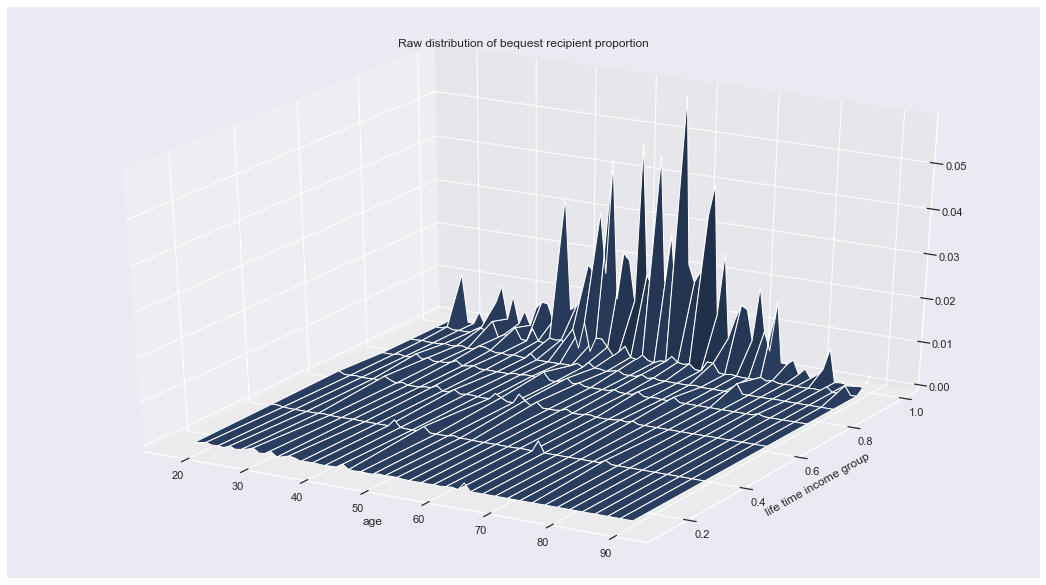

In [142]:
age_vec = np.linspace(18, 90, 73)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85,
                          0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('Raw distribution of bequest recipient proportion')
ax.set_ylabel('life time income group')
ax.set_xlabel('age')

b)

In [135]:
bq_ind_data = pd.read_csv('BQ_ind_data.txt', delimiter=',')
age = bq_ind_data['age']
inpctl = bq_ind_data['income_pctl']

Text(0.5, 0, 'life time income group')

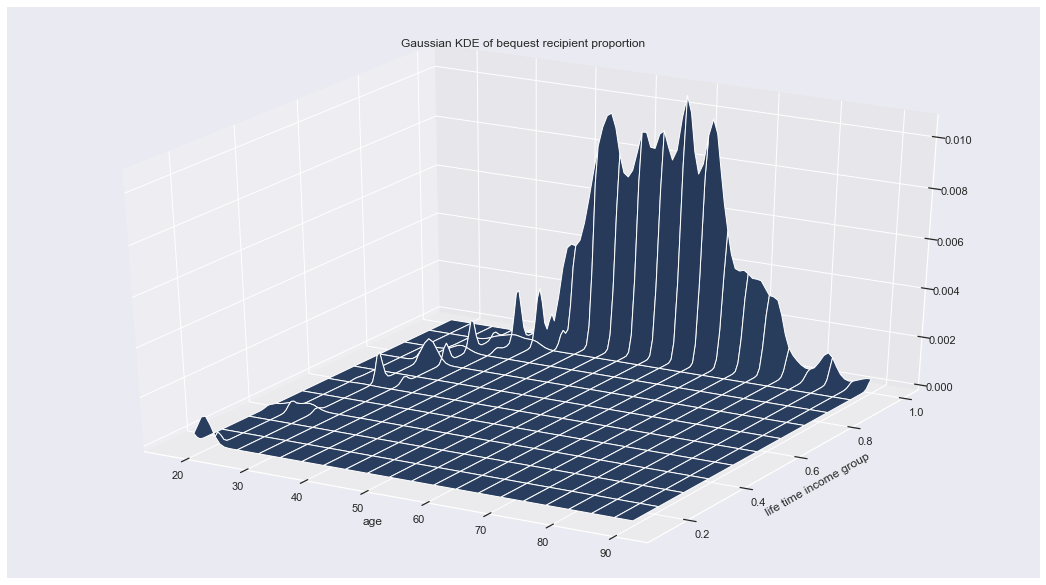

In [141]:
from scipy.stats import gaussian_kde

bandwidth = 0.1
kernel = gaussian_kde(bq_ind_data.T, bw_method=bandwidth)

age_min = age.min()
age_max = age.max()
inpctl_min = inpctl.min()
inpctl_max = inpctl.max()

age_i, inpctl_i = np.mgrid[age_min:age_max:100j,
                              inpctl_min:inpctl_max:100j]
coords = np.vstack([item.ravel() for item in [age_i, inpctl_i]])

Z = np.reshape(kernel(coords), age_i.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.gca(projection='3d')
ax.plot_surface(age_i, inpctl_i, Z_scaled, rstride=5)
ax.set_title('Gaussian KDE of bequest recipient proportion with bandwith of 0.1')
ax.set_xlabel("age")
ax.set_ylabel("life time income group")

Text(0.5, 0, 'life time income group')

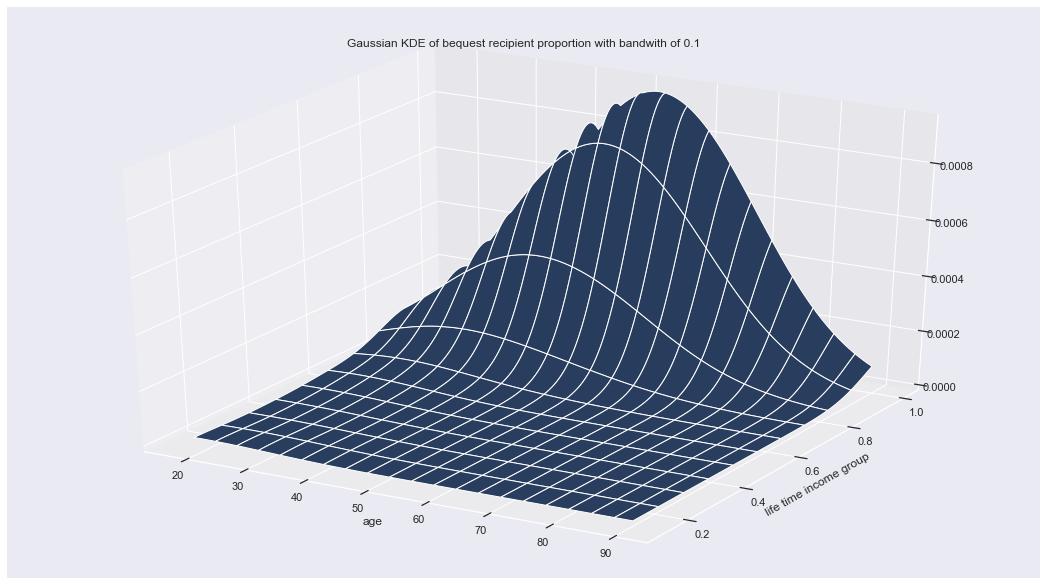

In [143]:
bandwidth = 1
kernel = gaussian_kde(bq_ind_data.T, bw_method=bandwidth)

age_min = age.min()
age_max = age.max()
inpctl_min = inpctl.min()
inpctl_max = inpctl.max()

age_i, inpctl_i = np.mgrid[age_min:age_max:100j,
                              inpctl_min:inpctl_max:100j]
coords = np.vstack([item.ravel() for item in [age_i, inpctl_i]])

Z = np.reshape(kernel(coords), age_i.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.gca(projection='3d')
ax.plot_surface(age_i, inpctl_i, Z_scaled, rstride=5)
ax.set_title('Gaussian KDE of bequest recipient proportion with bandwith of 1')
ax.set_xlabel("age")
ax.set_ylabel("life time income group")

Text(0.5, 0, 'life time income group')

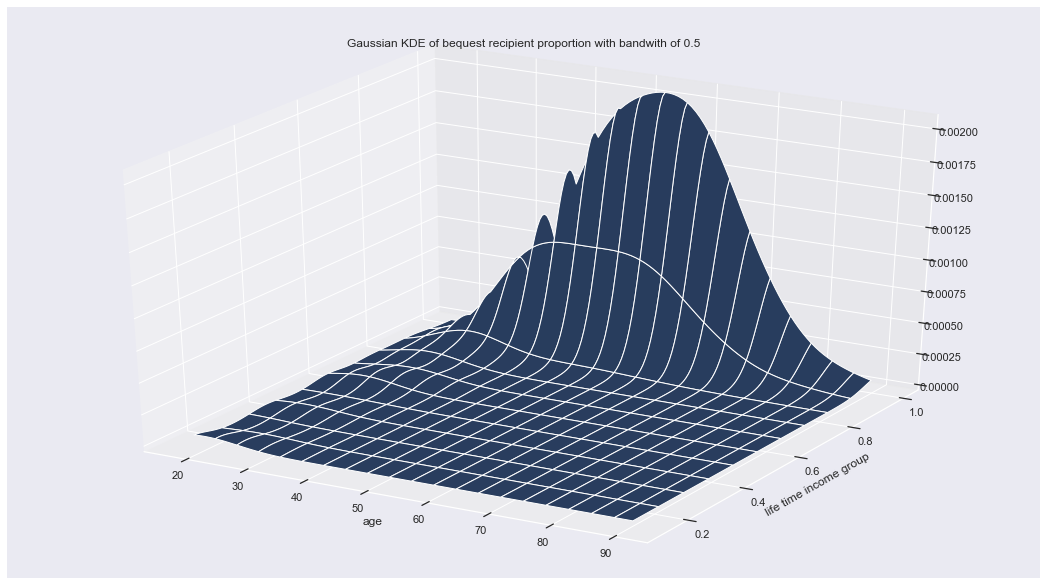

In [153]:
bandwidth = 0.5
kernel = gaussian_kde(bq_ind_data.T, bw_method=bandwidth)

age_min = age.min()
age_max = age.max()
inpctl_min = inpctl.min()
inpctl_max = inpctl.max()

age_i, inpctl_i = np.mgrid[age_min:age_max:100j,
                              inpctl_min:inpctl_max:100j]
coords = np.vstack([item.ravel() for item in [age_i, inpctl_i]])

Z = np.reshape(kernel(coords), age_i.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.gca(projection='3d')
ax.plot_surface(age_i, inpctl_i, Z_scaled, rstride=5)
ax.set_title('Gaussian KDE of bequest recipient proportion with bandwith of 0.5')
ax.set_xlabel("age")
ax.set_ylabel("life time income group")

Clearly, for a 2-dimension Gaussian KDE, larger bandwidths easily overfit. Having tried a few values below 0.5, though, I noticed that they make the spikes way to concentrated on the 7th lifetime income category. So bandwidth of 0.5 is a practical choice.

In [183]:
Z_scaled.sum()

1.0000000000000002

In [184]:
print(np.rint((61-18)/73*100))
print(np.rint(6/7*100))

59.0
86.0


The estimated kernal density for 61 years old recipients in the 6th lifetime income category is the following:

In [185]:
Z_scaled[59, 86]

0.0002137779839438978